# Linear Regression

$$ \hat{y} = \hat{\theta}_{0} + \hat{\theta}_{1}x_{1} + ... + \hat{\theta}_{n}x_{n}$$

Or the vectorized form:

$$ \hat{y} = h_{\theta}(x) = \theta^{T}x$$

where:

$\theta$ is the parameter vector.

$x$ is the instance's feature vector.

$h_{\theta}$ is the hypothesis function.


We want to select (fit) the parameters $\theta$ so that the model best fits the training set.

## Least Squares Regression

The most common performance measure of a regression model is the Root Mean Square Error (RMSE). Therefore, to train a Linear Regression model, you need to find the value of $\theta$ that minimizes the RMSE. In practice, it is simpler to minimize the Mean Square Error (MSE) than the RMSE, and it leads to the same result (because the value that minimizes a function also minimizes its square root).

$$RMSE = \sqrt{\frac{1}{m}\sum_{i=1}^{m}(h_{\theta}(x^{(i)})- y^{(i)})^{2}}$$

$$MSE = \frac{1}{m}\sum_{i=1}^{m}(h_{\theta}(x^{(i)})- y^{(i)})^{2}$$

For the linear regression model:

$$J(\theta) = MSE = \frac{1}{m}\sum_{i=1}^{m}(\theta^{T}x^{(i)}- y^{(i)})^{2}$$

### The Normal Equation

$$\hat{\theta} = (X^{T}X)^{-1}X^{T}y$$

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns; sns.set()

X = np.random.randn(100, 1)
y = 4 + 3 * X + np.random.randn(100, 1)

plt.figure(figsize=(16, 9))
plt.scatter(X, y);

In [2]:
X_aug = np.concatenate((np.ones((100, 1)), X), axis=1)
theta = np.linalg.inv(X_aug.T @ X_aug) @ X_aug.T @ y

print("Estimated Coefficients: \n{}".format(theta))

Estimated Coefficients: 
[[4.02903321]
 [3.08420849]]


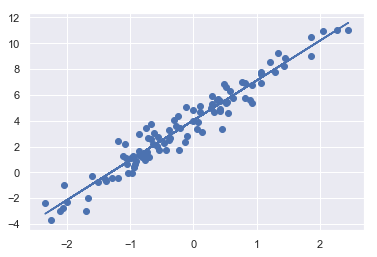

In [3]:
y_pred = X_aug @ theta
plt.scatter(X, y)
plt.plot(X, y_pred);

In [4]:
import statsmodels.api as sm

X_aug = sm.add_constant(X)
model = sm.OLS(y, X_aug).fit()
y_pred = model.predict(X_aug)
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.939
Model:                            OLS   Adj. R-squared:                  0.938
Method:                 Least Squares   F-statistic:                     1501.
Date:                Tue, 01 Oct 2019   Prob (F-statistic):           3.15e-61
Time:                        21:55:09   Log-Likelihood:                -121.59
No. Observations:                 100   AIC:                             247.2
Df Residuals:                      98   BIC:                             252.4
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          4.0290      0.084     47.974      0.000       3.862       4.196
x1             3.0842      0.080     38.744      0.000       2.926       3.242
==============================================================================
Omnibus:                        0.345   Durbin-Watson:                   2.038
Prob(Omnibus):                  0.841   Jarque-Bera (JB):                0.413
Skew:                           0.135   Prob(JB):                        0.813
Kurtosis:                       2.838   Cond. No.                         1.22
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

[4.02903321]
[[3.08420849]]


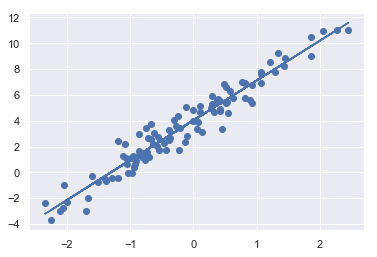

In [5]:
from sklearn.linear_model import LinearRegression

model = LinearRegression()
model.fit(X, y)

print(model.intercept_)
print(model.coef_)

y_pred = model.predict(X)

plt.scatter(X, y)
plt.plot(X, y_pred);

In [8]:
boston_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
CRIM       506 non-null float64
ZN         506 non-null float64
INDUS      506 non-null float64
CHAS       506 non-null float64
NOX        506 non-null float64
RM         506 non-null float64
AGE        506 non-null float64
DIS        506 non-null float64
RAD        506 non-null float64
TAX        506 non-null float64
PTRATIO    506 non-null float64
B          506 non-null float64
LSTAT      506 non-null float64
PRICE      506 non-null float64
dtypes: float64(14)
memory usage: 55.4 KB


### Gradient Descent Regression

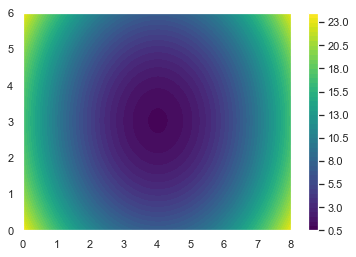

In [10]:
X = np.random.randn(100, 1)
y = 4 + 3 * X + np.random.randn(100, 1)

m, n = X.shape

theta0 = np.linspace(0, 8, 1000)
theta1 = np.linspace(0, 6, 1000)
Theta0, Theta1 = np.meshgrid(theta0, theta1)

J = (np.array([Theta0  + Theta1 * X[i, 0] - y[i] for i in range(m)]) ** 2).mean(axis=0)

plt.contourf(Theta0, Theta1, J, 50, cmap='viridis')
plt.colorbar()

Gradient:

$$\nabla_{\theta} MSE =\frac{2}{m}X^{T}(X\theta - y)$$

Update Rule:
 
$$\theta^{\ next \ step}:= \theta - \alpha \nabla_{\theta} MSE$$

Final Parameters: 
 [[3.7580064 ]
 [3.06935753]]


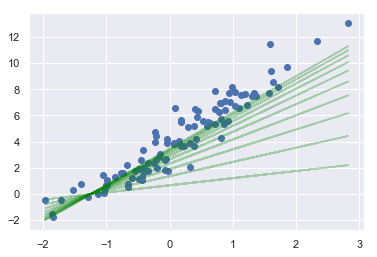

In [11]:
def linear_reg_gd(X, y, learning_rate=0.01, steps=100):
    m, n = X.shape
    
    X_aug = np.concatenate((np.ones((m, 1)), X), axis=1)

    theta = np.random.randn(2, 1)

    fig, ax = plt.subplots()
    ax.scatter(X, y)

    for i in range(steps):
        theta -= learning_rate * (2 / m) * X_aug.T @ (X_aug @ theta - y)
        y_pred = X_aug @ theta

        if i // (steps // 10) == 0:
            ax.plot(X_aug[:, 1], y_pred, color='green', alpha=0.3)
    print('Final Parameters: \n {}'.format(theta))
    
X = np.random.randn(100, 1)
y = 4 + 3 * X + np.random.randn(100, 1)

linear_reg_gd(X, y, learning_rate=0.1)

C:\Users\secan\Anaconda3\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:183: FutureWarning: max_iter and tol parameters have been added in SGDRegressor in 0.19. If max_iter is set but tol is left unset, the default value for tol in 0.19 and 0.20 will be None (which is equivalent to -infinity, so it has no effect) but will change in 0.21 to 1e-3. Specify tol to silence this warning.
  FutureWarning)
C:\Users\secan\Anaconda3\lib\site-packages\sklearn\utils\validation.py:761: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


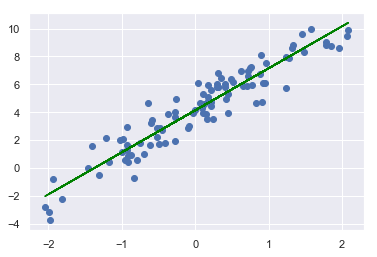

In [22]:
from sklearn.linear_model import SGDRegressor

model = SGDRegressor(penalty=None, learning_rate='constant', eta0=0.01, max_iter=100, verbose=0)
model.fit(X, y)
y_pred = model.predict(X)

plt.scatter(X, y)
plt.plot(X, y_pred, color='green');

## Ridge Regression

Ridge Regression(also called Tikhonov regularization) is a regularized version of Linear Regression: a regularization term is added to the cost function. This forces the learning algorithm to not only fit the data but also keep the model weights as small as possible. Note that the regularization term should only be added to the cost function during training. Once the model is trained, you want to evaluate the model’s performance using the unregularized performance measure.

$$min \ J(\theta) = \frac{1}{m}\sum_{i=1}^{m}(\theta^{T}x^{(i)}- y^{(i)})^{2}$$

$subject \ to$

$$\sum_{j=1}^{n}\theta_{j}^{2} \leq t$$

Cost Function:

$$min \ J(\theta) = \frac{1}{m}\sum_{i=1}^{m}(\theta^{T}x^{(i)}- y^{(i)})^{2} + \alpha \sum_{j=1}^{n}\theta_{j}^{2}$$

Closed Form

$$\theta = (X^{T} X + \alpha A)^{-1} X^{T}y$$

$A$: is the $(n \ x \ n)$ identity matrix with a $0$ in the top left corner.

In [13]:
def ridge_reg(X, y, reg=1):
    m, n = X.shape
    
    X_aug = np.concatenate((np.ones((m, 1)), X), axis=1)
    
    A = np.eye(n+1)
    A[0, 0] = 0
    
    theta = np.linalg.inv(X_aug.T @ X_aug + reg * A) @ X_aug.T @ y
    
    y_pred = X_aug @ theta
    
    print('Final Parameters: \n {}'.format(theta))
    
X = np.random.randn(100, 1)
y = 4 + 3 * X + np.random.randn(100, 1)
    
ridge_reg(X, y, reg=0.01)

Final Parameters: 
 [[4.06515192]
 [3.04863825]]


In [14]:
from sklearn.linear_model import Ridge

X = np.random.randn(100, 1)
y = 4 + 3 * X + np.random.randn(100, 1)

model = Ridge(alpha=0.01, )
model.fit(X, y)
print(model.intercept_, model.coef_)

[3.89410286] [[3.10481908]]


-- Epoch 1
Norm: 0.20, NNZs: 1, Bias: 0.369443, T: 100, Avg. loss: 10.532860
Total training time: 0.00 seconds.
-- Epoch 2
Norm: 0.39, NNZs: 1, Bias: 0.703378, T: 200, Avg. loss: 8.907557
Total training time: 0.00 seconds.
-- Epoch 3
Norm: 0.57, NNZs: 1, Bias: 1.005763, T: 300, Avg. loss: 7.554731
Total training time: 0.00 seconds.
-- Epoch 4
Norm: 0.74, NNZs: 1, Bias: 1.278810, T: 400, Avg. loss: 6.428859
Total training time: 0.00 seconds.
-- Epoch 5
Norm: 0.90, NNZs: 1, Bias: 1.525611, T: 500, Avg. loss: 5.491673
Total training time: 0.00 seconds.
-- Epoch 6
Norm: 1.04, NNZs: 1, Bias: 1.749873, T: 600, Avg. loss: 4.709223
Total training time: 0.00 seconds.
-- Epoch 7
Norm: 1.18, NNZs: 1, Bias: 1.952830, T: 700, Avg. loss: 4.055000
Total training time: 0.00 seconds.
-- Epoch 8
Norm: 1.30, NNZs: 1, Bias: 2.136715, T: 800, Avg. loss: 3.508490
Total training time: 0.02 seconds.
-- Epoch 9
Norm: 1.42, NNZs: 1, Bias: 2.302988, T: 900, Avg. loss: 3.051198
Total training time: 0.02 seconds.


-- Epoch 77
Norm: 3.09, NNZs: 1, Bias: 3.892717, T: 7700, Avg. loss: 0.622942
Total training time: 0.11 seconds.
-- Epoch 78
Norm: 3.09, NNZs: 1, Bias: 3.893190, T: 7800, Avg. loss: 0.622941
Total training time: 0.11 seconds.
-- Epoch 79
Norm: 3.09, NNZs: 1, Bias: 3.893564, T: 7900, Avg. loss: 0.622931
Total training time: 0.11 seconds.
-- Epoch 80
Norm: 3.09, NNZs: 1, Bias: 3.893943, T: 8000, Avg. loss: 0.622913
Total training time: 0.11 seconds.
-- Epoch 81
Norm: 3.09, NNZs: 1, Bias: 3.893743, T: 8100, Avg. loss: 0.622905
Total training time: 0.11 seconds.
-- Epoch 82
Norm: 3.09, NNZs: 1, Bias: 3.893942, T: 8200, Avg. loss: 0.622902
Total training time: 0.11 seconds.
-- Epoch 83
Norm: 3.09, NNZs: 1, Bias: 3.893855, T: 8300, Avg. loss: 0.622889
Total training time: 0.11 seconds.
-- Epoch 84
Norm: 3.09, NNZs: 1, Bias: 3.893857, T: 8400, Avg. loss: 0.622891
Total training time: 0.11 seconds.
-- Epoch 85
Norm: 3.09, NNZs: 1, Bias: 3.893467, T: 8500, Avg. loss: 0.622864
Total training tim

C:\Users\secan\Anaconda3\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:183: FutureWarning: max_iter and tol parameters have been added in SGDRegressor in 0.19. If max_iter is set but tol is left unset, the default value for tol in 0.19 and 0.20 will be None (which is equivalent to -infinity, so it has no effect) but will change in 0.21 to 1e-3. Specify tol to silence this warning.
  FutureWarning)
C:\Users\secan\Anaconda3\lib\site-packages\sklearn\utils\validation.py:761: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


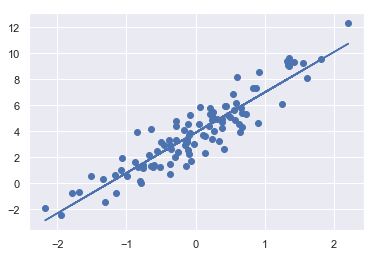

In [15]:
from sklearn.linear_model import SGDRegressor

model = SGDRegressor(penalty='l2', learning_rate='constant', eta0=0.001, max_iter=100, verbose=1)
model.fit(X, y)
y_pred = model.predict(X)

plt.scatter(X, y)
plt.plot(X, y_pred);

## Lasso Regression

Least Absolute Shrinkage and Selection Operator Regression (simply called Lasso Regression) is another regularized version of Linear Regression: just like Ridge Regression, it adds a regularization term to the cost function, but it uses the ℓ1 norm of the weight vector instead of half the square of the ℓ2 norm.

$$min \ J(\theta) = \frac{1}{m}\sum_{i=1}^{m}(\theta^{T}x^{(i)}- y^{(i)})^{2}$$

$subject \ to$

$$\sum_{j=1}^{n}|\theta_{j}| \leq t$$

Cost Function:

$$min \ J(\theta) = \frac{1}{m}\sum_{i=1}^{m}(\theta^{T}x^{(i)}- y^{(i)})^{2} + \alpha \sum_{j=1}^{n}|\theta_{j}|$$

The Lasso cost function is not differentiable at $θ_{i} = 0$ (for i = 1, 2, , n), but Gradient Descent still works fine if you use a subgradient vector g.

Final Parameters: 
 [[0.05935713]
 [2.74559232]]


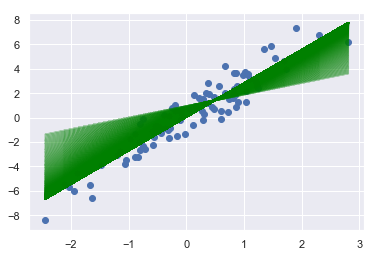

In [16]:
def lasso_reg(X, y, learning_rate=0.01, steps=1000, reg=1):
    m, n = X.shape
    
    X_aug = np.concatenate((np.ones((m, 1)), X), axis=1)

    theta = np.random.randn(n + 1, 1)

    fig, ax = plt.subplots()
    ax.scatter(X, y)

    for i in range(steps):
        theta -= learning_rate * (2 / m) * X_aug.T @ (X_aug @ theta - y) + reg * np.sign(theta)
        y_pred = X_aug @ theta

        if i // (steps // 10) == 0:
            ax.plot(X_aug[:, 1], y_pred, color='green', alpha=0.3)
    print('Final Parameters: \n {}'.format(theta))

    
X = np.random.randn(100, 1)
y = 3 * X + np.random.randn(100, 1)
    
lasso_reg(X, y, reg=0.001, steps=10000)

In [17]:
from sklearn.linear_model import Lasso

model = Lasso(alpha=0.1)
model.fit(X, y)
print(model.intercept_, model.coef_)

[0.11467982] [2.6903827]


### Boston Dataset

In [6]:
from sklearn.datasets import load_boston
boston = load_boston()
boston_df = pd.DataFrame(boston.data, columns=boston.feature_names)
boston_df['PRICE'] = boston.target
boston_df.head()

CRIM    ZN  INDUS  CHAS    NOX     RM   AGE     DIS  RAD    TAX  \
0  0.00632  18.0   2.31   0.0  0.538  6.575  65.2  4.0900  1.0  296.0   
1  0.02731   0.0   7.07   0.0  0.469  6.421  78.9  4.9671  2.0  242.0   
2  0.02729   0.0   7.07   0.0  0.469  7.185  61.1  4.9671  2.0  242.0   
3  0.03237   0.0   2.18   0.0  0.458  6.998  45.8  6.0622  3.0  222.0   
4  0.06905   0.0   2.18   0.0  0.458  7.147  54.2  6.0622  3.0  222.0   

   PTRATIO       B  LSTAT  PRICE  
0     15.3  396.90   4.98   24.0  
1     17.8  396.90   9.14   21.6  
2     17.8  392.83   4.03   34.7  
3     18.7  394.63   2.94   33.4  
4     18.7  396.90   5.33   36.2

In [7]:
print(boston.DESCR)

.. _boston_dataset:

Boston house prices dataset
---------------------------

**Data Set Characteristics:**  

    :Number of Instances: 506 

    :Number of Attributes: 13 numeric/categorical predictive. Median Value (attribute 14) is usually the target.

    :Attribute Information (in order):
        - CRIM     per capita crime rate by town
        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
        - INDUS    proportion of non-retail business acres per town
        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
        - NOX      nitric oxides concentration (parts per 10 million)
        - RM       average number of rooms per dwelling
        - AGE      proportion of owner-occupied units built prior to 1940
        - DIS      weighted distances to five Boston employment centres
        - RAD      index of accessibility to radial highways
        - TAX      full-value property-tax rate per $10,000
        - PTRATIO  pu

### Lasso Path

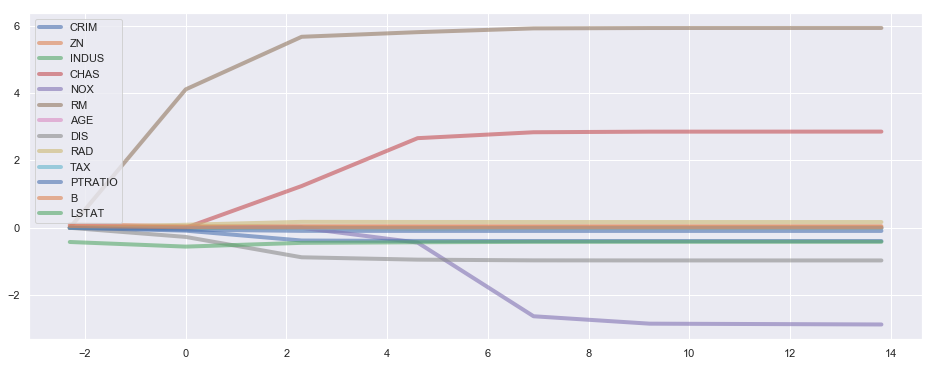

In [18]:
from sklearn.linear_model import lasso_path

X = boston_df.drop('PRICE', axis=1)
y = boston_df['PRICE']

alphas, coefs, _ = lasso_path(X, y, alphas=[0.000001, 0.0001, 0.001, 0.01, 0.1, 1, 10])

plt.figure(figsize=(16, 6))
for i, coef in enumerate(coefs):
    plt.plot(-np.log(alphas), coef, label=X.columns[i], linewidth=4, alpha=0.6)
    
plt.legend()
    

## Logistic Regression

Just like a Linear Regression model, a Logistic Regression model computes a weighted sum of the input features (plus a bias term), but instead of outputting the result directly like the Linear Regression model does, it outputs the logistic of this result .

$$\hat{p} = h_{\theta}(x) = \sigma(\theta^{T}x)$$

where $\sigma(\cdot)$ is the logistic function:

$$\sigma(t) = \frac{1}{1 + e^{-t}}$$

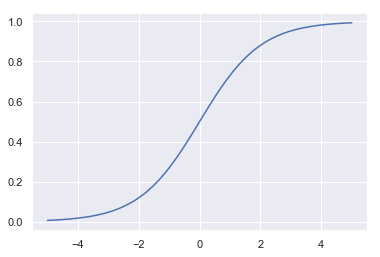

In [5]:
sigm = lambda t: 1 / (1 + np.e ** (-t))
t_range = np.linspace(-5, 5)
plt.plot(t_range, sigm(t_range));

Cost Function:


$$J(\theta) = \frac{1}{m}\sum_{i=1}^{m}[y^{(i)}log(\hat{p}^{(i)}) + (1 - y^{(i)})log(1 - \hat{p}^{(i)})])$$


$$\frac{\partial}{\partial \theta_{j}}J(\theta) = \frac{1}{m}\sum_{i=1}^{m} (\sigma(\theta^{T}x^{(i)}) - y^{(i)})x_{j}^{(i)}$$

In [7]:
from sklearn import datasets
from sklearn.linear_model import LogisticRegression

iris = datasets.load_iris()

In [14]:
iris_df = pd.DataFrame(iris['data'], columns=iris['feature_names'])
iris_df['class'] = iris['target']
iris_df.head()

sepal length (cm)  sepal width (cm)  petal length (cm)  petal width (cm)  \
0                5.1               3.5                1.4               0.2   
1                4.9               3.0                1.4               0.2   
2                4.7               3.2                1.3               0.2   
3                4.6               3.1                1.5               0.2   
4                5.0               3.6                1.4               0.2   

   class  
0      0  
1      0  
2      0  
3      0  
4      0